<a href="https://colab.research.google.com/github/sahay-46/shruti_ranjan/blob/ML_Lab/Copy_of_2348545_MSAI_lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing necessary libraries
import pandas as pd
import seaborn as sns
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load the Churn Modeling dataset
data = pd.read_csv('/content/Churn_Modelling (1).csv')

In [ ]:
#Checking for NULL values
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
#Dropping unrelevant columns
data=data.drop(columns='CustomerId', axis=1)
data=data.drop(columns='Surname', axis=1)
data=data.drop(columns='RowNumber', axis=1)

<Axes: >

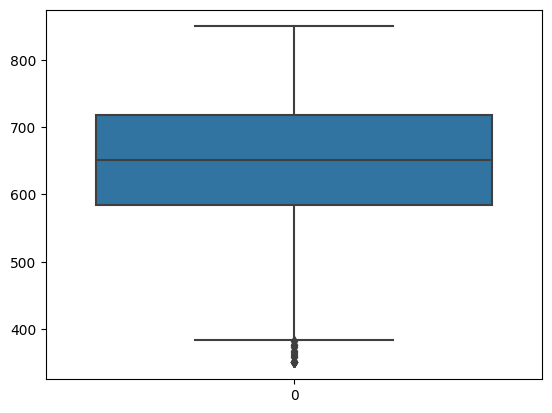

In [ ]:
#Plot numerical data and check for outliers
sns.boxplot(data['CreditScore'])

In [ ]:
#Checking for Quartile Values
data['CreditScore'].describe()

count    10000.000000
mean       650.528800
std         96.653299
min        350.000000
25%        584.000000
50%        652.000000
75%        718.000000
max        850.000000
Name: CreditScore, dtype: float64

In [ ]:
#Finding the number of ouliers
b = np.where(data['CreditScore']>718) or (data['CreditScore']<584)
a = np.array(b[0])
len(a)

2463

In [ ]:

#Defining function to find outliers and drop them from the data
def drop_outlier(data,col_name):
  print(data.shape)
  z = np.abs(stats.zscore(col_name))
  data.drop(data.index[np.where(abs(z)>2.5)],inplace=True)
  print("New data shape post deletion: "+str(data.shape))

In [ ]:
#Removing ouliers based on credit score
drop_outlier(data,data['CreditScore'])

(10000, 11)
New data shape post deletion: (9974, 11)


(array([ 611., 2175., 3622., 1866.,  821.,  521.,  208.,  127.,   19.,
           4.]),
 array([18. , 25.4, 32.8, 40.2, 47.6, 55. , 62.4, 69.8, 77.2, 84.6, 92. ]),
 <BarContainer object of 10 artists>)

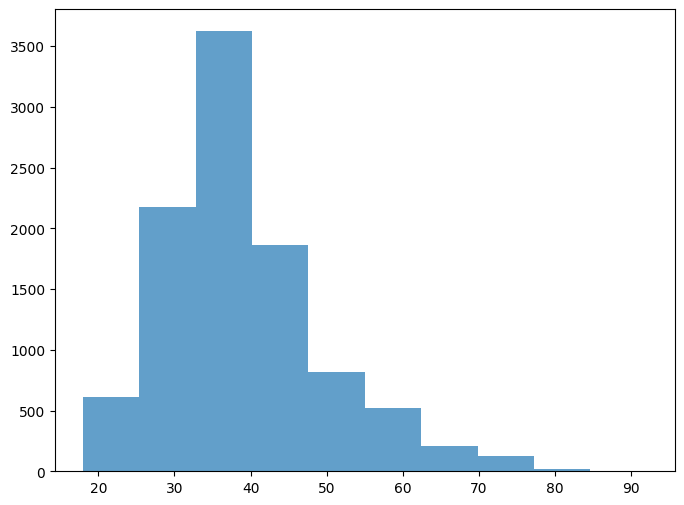

In [ ]:
#Age without binning
plt.figure(figsize=(8,6))
plt.hist(data['Age'],alpha=0.7)

<Axes: >

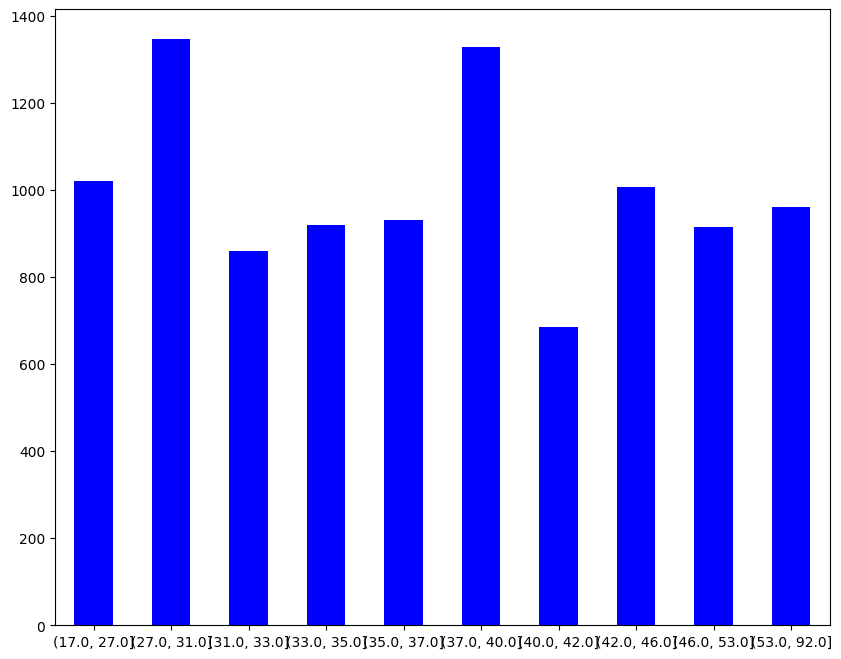

In [ ]:
#Dividing age into 10 bins
data['bin'] = pd.qcut(data['Age'], q=10, precision=0)
data['bin'].value_counts(sort=False).plot.bar(rot=0, color="b", figsize=(10,8))

In [ ]:
#Assigning nominal data to numeric values
from sklearn.preprocessing import LabelEncoder
for col in ['Geography','Gender']:
  le=LabelEncoder()
  data[col]=le.fit_transform(data[col])
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,bin
0,619,0,0,42,2,0.00,1,1,1,101348.88,1,"(40.0, 42.0]"
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0,"(40.0, 42.0]"
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1,"(40.0, 42.0]"
3,699,0,0,39,1,0.00,2,0,0,93826.63,0,"(37.0, 40.0]"
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0,"(42.0, 46.0]"


In [ ]:
#Finding Correlation between variables
data.corr()


<ipython-input-14-7082d2ea8743>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,0.009926,-0.003682,0.000142,-0.000666,0.007544,0.010612,-0.003830,0.022862,0.002115,-0.014016
Geography,0.009926,1.000000,0.004672,0.023102,0.004614,0.068472,0.003452,-0.009176,0.006465,-0.001451,0.034665
Gender,-0.003682,0.004672,1.000000,-0.026600,0.015078,0.012930,-0.021309,0.005613,0.022102,-0.008129,-0.106230
Age,0.000142,0.023102,-0.026600,1.000000,-0.010542,0.028130,-0.028960,-0.011095,0.086791,-0.008833,0.284212
Tenure,-0.000666,0.004614,0.015078,-0.010542,1.000000,-0.011807,0.013171,0.022730,-0.027771,0.007674,-0.013276
Balance,0.007544,0.068472,0.012930,0.028130,-0.011807,1.000000,-0.306066,-0.015454,-0.009788,0.012576,0.118399
NumOfProducts,0.010612,0.003452,-0.021309,-0.028960,0.013171,-0.306066,1.000000,0.003370,0.010094,0.014849,-0.046463
HasCrCard,-0.003830,-0.009176,0.005613,-0.011095,0.022730,-0.015454,0.003370,1.000000,-0.012328,-0.010004,-0.008566
IsActiveMember,0.022862,0.006465,0.022102,0.086791,-0.027771,-0.009788,0.010094,-0.012328,1.000000,-0.010470,-0.154945
EstimatedSalary,0.002115,-0.001451,-0.008129,-0.008833,0.007674,0.012576,0.014849,-0.010004,-0.010470,1.000000,0.009793


<ipython-input-15-099fe24b2859>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True)


<Axes: >

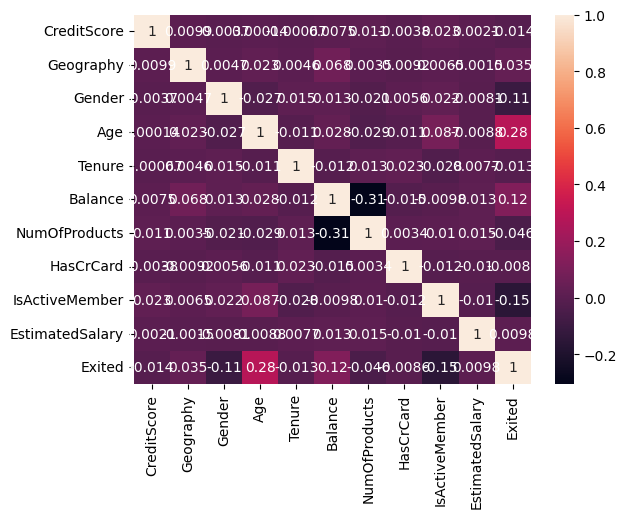

In [ ]:
#Plotting the same on heat map
sns.heatmap(data.corr(),annot=True)


In [ ]:
#Checking relations between variables and customer churn using chi-square and plotting the same
from sklearn.feature_selection import chi2
X=data.drop(columns=['Exited'])
Y=data['Exited']

In [ ]:
chi_scores=chi2(X,Y)
chi_values=pd.Series(chi_scores[0],index=X.columns)
chi_values.sort_values(ascending=False,inplace=True)
chi_values.plot.bar()

TypeError: ignored

In [ ]:
#Finding least affecting variables
p_values=pd.Series(chi_scores[1],index=X.columns)
p_values.sort_values(ascending=False,inplace=True)
p_values.plot.bar()

NameError: ignored

In [ ]:
#Standardizing numerical data
required=['CreditScore','Age','Tenure','Balance','EstimatedSalary']
sc = StandardScaler()
data[required] = sc.fit_transform(data[required])
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,bin
0,-0.336682,0,0,0.295190,-1.042537,-1.225354,1,1,1,0.023071,1,"(40.0, 42.0]"
1,-0.451555,2,0,0.199765,-1.388408,0.117724,1,0,1,0.217677,0,"(40.0, 42.0]"
2,-1.558514,0,0,0.295190,1.032689,1.333318,3,1,0,0.241825,1,"(40.0, 42.0]"
3,0.498759,0,0,0.008917,-1.388408,-1.225354,2,0,0,-0.107706,0,"(37.0, 40.0]"
4,2.075653,2,0,0.390614,-1.042537,0.786042,1,1,1,-0.364010,0,"(42.0, 46.0]"


In [ ]:
#Applying PCA- into 8 components
columns=data[['HasCrCard', 'IsActiveMember', 'Geography', 'NumOfProducts', 'Gender','Tenure','CreditScore','Age','Balance','EstimatedSalary']]
X=columns
pca = PCA(n_components=8)
np.ascontiguousarray(pca.fit_transform(X))
pca.explained_variance_ratio_

array([0.15965824, 0.15070663, 0.14855422, 0.14735486, 0.14551211,
       0.10052807, 0.04344455, 0.03768083])

In [ ]:
#Applying PCA- into 5 components
pca = PCA(n_components=5)
np.ascontiguousarray(pca.fit_transform(X))
pca.explained_variance_ratio_

array([0.15965824, 0.15070663, 0.14855422, 0.14735486, 0.14551211])

In [ ]:
#Applying PCA- into 3 components
pca = PCA(n_components=3)
np.ascontiguousarray(pca.fit_transform(X))
pca.explained_variance_ratio_

array([0.15965824, 0.15070663, 0.14855422])